In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt

# Spatial Aggregation

Pandas ignores NaN values while performing aggregations
Premature optimization is the root of all evil, or at least most evil in programming; the true issue is that programmers have worried about efficiency much too much, in the wrong places, and at the wrong times. -Donald Knuth -'The Art of Programming' 
Meaning - In short do not devote too much time and effeort for unrequired stuff - at the cost of other important stuff

### Question 1 
#### Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [5]:
data_set = pd.read_csv('Downloads/Data.csv')

In [6]:
group_by=data_set.groupby(['state'])['PM2.5'].mean()
print(" State having highest average PM2.5 concentration across all stations and across all years:\n",group_by.idxmax(),group_by.max())

 State having highest average PM2.5 concentration across all stations and across all years:
 Delhi 104.1009176780069


### Question 2
#### Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [8]:
mask=data_set['Timestamp'].str.slice(0,4)=='2023'
data_2023=data_set[mask]
count_by_state=data_2023[data_2023['PM2.5']>300].groupby(['state','Timestamp']).count().reset_index()['state'].value_counts()
## First creates table according to state and timestamps, then counts the common and unique days among all states
print('State which had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023:',count_by_state.idxmax(),count_by_state.max(),
     'days')

State which had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023: Delhi 49 days


### Question 3
#### Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

##### Variability can be measured by standard deviation

In [11]:
group=data_2023.groupby('state')['PM2.5']
data_q3=group.std()

print("State which had the highest varibility across all its stations:",data_q3.idxmax(),'Standard Deviation:',data_q3.max(),'\nInterQuartile range:\n',data_q3.quantile([0.25,0.50,0.75]))

State which had the highest varibility across all its stations: Delhi Standard Deviation: 82.79710576209911 
InterQuartile range:
 0.25    20.135598
0.50    33.210780
0.75    40.119354
Name: PM2.5, dtype: float64


### Question 4
#### Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [13]:
data_slice=data_set['Timestamp'].str.slice(0,4)
data_2020_2021=data_set[(data_slice=='2020') | (data_slice=='2021')]
data_q4=data_2020_2021.groupby('state')['PM2.5'].mean()
print('Lowest Average PM2.5 level by state:',data_q4.idxmin(),data_q4.min())

Lowest Average PM2.5 level by state: Mizoram 14.323350150801287


# Temporal Aggregation


### Question 1
#### Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.


In [16]:
mask_aug_2020= data_set['Timestamp'].str.slice(0,7) == '2020-08'
data_aug_2020 = data_set[mask_aug_2020][['station','PM2.5']]
print('The station that recorded the highest value of PM 2.5 for the month of Aug of 2020 is',data_aug_2020[data_aug_2020['PM2.5']==data_aug_2020['PM2.5'].max()],data_aug_2020['PM2.5'].max())

The station that recorded the highest value of PM 2.5 for the month of Aug of 2020 is                                               station   PM2.5
737399  Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB  805.51 805.51


In [17]:
data_aug_2020

,station,PM2.5
733788,"32Bungalows, Bhilai - CECB",NaN
733789,"AIIMS, Raipur - CECB",NaN
733790,"Adarsh Nagar, Jaipur - RSPCB",20.401064
733791,"Airoli, Navi Mumbai - MPCB",NaN
733792,"Airport Area, Indore - IMC",NaN
...,...,...
751174,"Worli, Mumbai - MPCB",11.490000
751175,"Yamunapuram, Bulandshahr - UPPCB",13.873684
751176,"Yerramukkapalli, Kadapa - APPCB",NaN
751177,"Zero Point GICI, Gangtok - SSPCB",NaN


### Question 2
#### For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

Thought Question - Since we are talking about air pollution and variation of seaaons, one factor to consider is the change in wind pattern and temperature, wind speed etc which may cause variation in the air pollution as these affect concentration of pollutants in air .

In [20]:
data_set.reset_index(inplace=True)
data_set=data_set.set_index('station')
station_data=data_set.loc['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
month_data_2018=station_data['Timestamp'].str.slice(0,7)
month_data_2018_summer=station_data.query('@month_data_2018 in ["2018-03","2018-04","2018-05"]')
month_data_2018_monsoon=station_data.query('@month_data_2018 in ["2018-06","2018-07","2018-08","2018-09"]')
month_data_2018_winter=station_data.query('@month_data_2018 in ["2018-12","2018-01","2018-02"]')
mean_summer=month_data_2018_summer['PM2.5'].mean()
mean_monsoon=month_data_2018_monsoon['PM2.5'].mean()
mean_winter=month_data_2018_winter['PM2.5'].mean()
value={'Summer':mean_summer,'Monsoon':mean_monsoon,'Winter':mean_winter}
value_df=pd.Series(value)
print('The season of maximum pollution in station Lal Bahadur Shastri Nagar, Kalaburagi:',value_df.idxmax(),'with PM2.5',value_df.max())

The season of maximum pollution in station Lal Bahadur Shastri Nagar, Kalaburagi: Winter with PM2.5 67.4923443634478


### Question 3
#### Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. 

a)Create a plot to show these trends Steps:
b)Calculate the monthly average PM2.5 for weekdays and weekends separately
c)X-axis: Months (January to December).Y-axis: Average PM2.5 levels.
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

Monthly Weekday average:
         Month      PM2.5
0     January  69.115419
1    February  62.541201
2       March  51.942440
3       April  38.790324
4         May  14.986212
5        June   9.534043
6        July   7.769066
7      August        NaN
8   September        NaN
9     October  55.484170
10   November  48.326451
11   December  74.505459 

Monthly Weekend average:
         Month      PM2.5
0     January  52.131611
1    February  53.946216
2       March  53.167747
3       April  41.405150
4         May  17.104372
5        June   7.695810
6        July   8.652231
7      August        NaN
8   September        NaN
9     October  62.974510
10   November  42.091224
11   December  88.985127

Weekday average over a year: 43.29947855208802 , Weekend average over a year 42.815399925881565


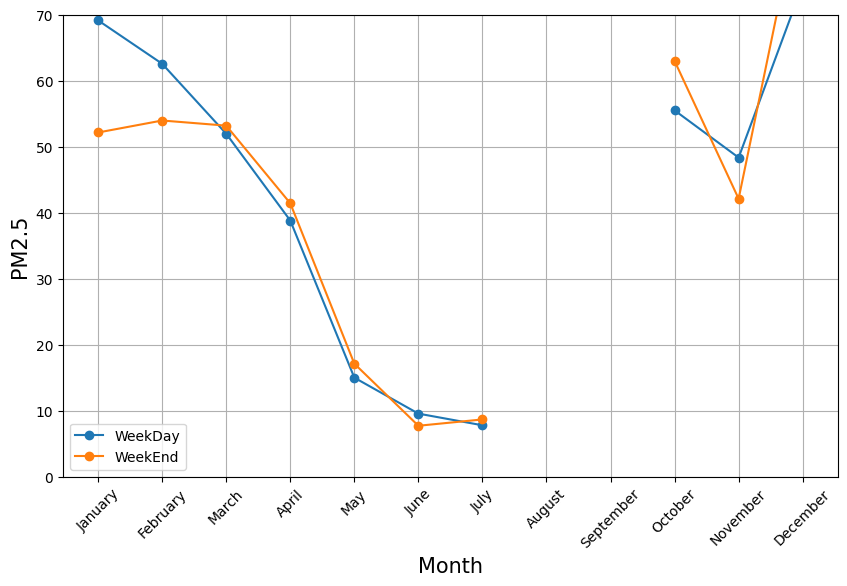

In [22]:
station_data_2021=station_data[pd.to_datetime(station_data['Timestamp']).dt.year==2021]
weekday_data=station_data_2021[pd.to_datetime(station_data_2021['Timestamp']).dt.weekday < 5]
weekend_data=station_data_2021[pd.to_datetime(station_data_2021['Timestamp']).dt.weekday >=5]


monthly_weekday_average=weekday_data.groupby(pd.to_datetime(weekday_data['Timestamp']).dt.month_name(),sort=False)['PM2.5'].mean()
monthly_weekend_average=weekend_data.groupby(pd.to_datetime(weekend_data['Timestamp']).dt.month_name(),sort=False)['PM2.5'].mean()

#printing data
print("Monthly Weekday average:\n",pd.DataFrame({"Month":monthly_weekday_average.index,"PM2.5":monthly_weekday_average.values}),'\n')
print("Monthly Weekend average:\n",pd.DataFrame({"Month":monthly_weekend_average.index,"PM2.5":monthly_weekend_average.values}))

#plotting data
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(monthly_weekday_average.index,monthly_weekday_average,label='WeekDay',marker='o')
ax.plot(monthly_weekend_average.index,monthly_weekend_average,label='WeekEnd',marker='o')
ax.set_ylim(0,70)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('PM2.5',fontsize=15)
ax.tick_params(axis='x',labelrotation=45)
ax.grid()
ax.legend()
print('\nWeekday average over a year:',monthly_weekday_average.mean(),', Weekend average over a year',monthly_weekend_average.mean())

# Spatio-Temporal Aggregation

### Question 1

In [25]:
datetime=pd.to_datetime(data_set.loc[:,'Timestamp'])
month_data=datetime.dt.month
mask_summer = (month_data == 3) | (month_data == 4) | (month_data ==5)
summer_data = data_set[mask_summer]
mask_monsoon = (month_data == 6) | (month_data == 7 ) | (month_data == 8 ) | (month_data ==9)
monsoon_data =data_set[mask_monsoon]
monsoon_levels=monsoon_data.groupby('state')['PM2.5'].median()
summer_levels=summer_data.groupby('state')['PM2.5'].median()
percentage_change_in_levels=(monsoon_levels-summer_levels)/monsoon_levels
data_change=pd.DataFrame({'State':percentage_change_in_levels.index, '% change':percentage_change_in_levels.values})
display(data_change)

#2022
mon_2022_a=pd.to_datetime(monsoon_data['Timestamp'])
monsoon_2022=monsoon_data[mon_2022_a.dt.year==2022]
sum_2022_a=pd.to_datetime(summer_data['Timestamp'])
summer_2022=summer_data[sum_2022_a.dt.year==2022]
sum_2022_level=summer_2022.groupby('state')['PM2.5'].median()
mon_2022_level=monsoon_2022.groupby('state')['PM2.5'].median()
difference_level = mon_2022_level-sum_2022_level
difference_level=abs(difference_level)
print('State which had the maximum difference in PM2.5 levels in summer and monsoon for the year 2022:',difference_level.idxmax(),end='')
print(' and change in PM2.5:',difference_level.max())


,State,% change
0,Andhra Pradesh,-0.471101
1,Arunachal Pradesh,-1.058176
2,Assam,-1.164311
3,Bihar,-1.100772
4,Chandigarh,-0.705721
5,Chhattisgarh,-0.691255
6,Delhi,-0.916041
7,Gujarat,-0.741722
8,Haryana,-0.592951
9,Himachal Pradesh,-0.278707


State which had the maximum difference in PM2.5 levels in summer and monsoon for the year 2022: Delhi and change in PM2.5: 51.30176249046528


### Question2

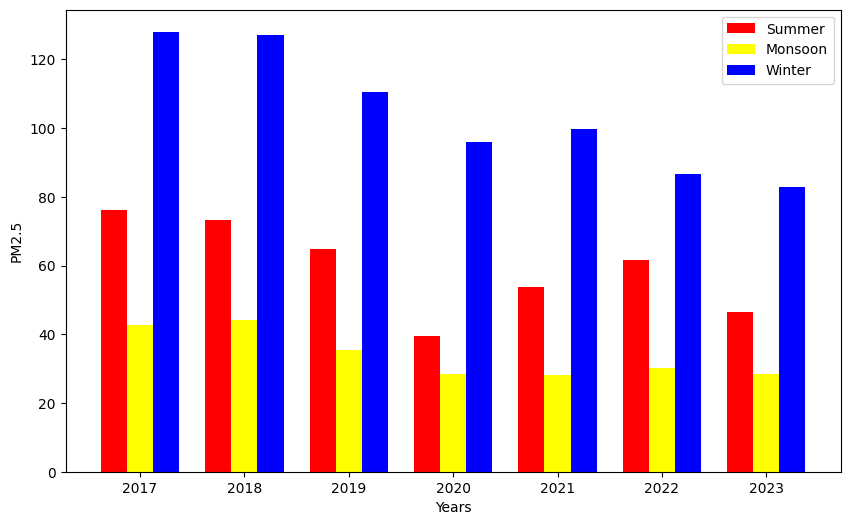

In [27]:
mask_winter=((month_data == 12)|(month_data==1)|(month_data==2))
winter_data=data_set[mask_winter]
fig,ax=plt.subplots(figsize=(10,6))
summer_data.set_index('state',inplace=True)
data_2017=np.array([])
data_2018=np.array([])
data_2019=np.array([])
data_2020=np.array([])
data_2021=np.array([])
data_2022=np.array([])
data_2023=np.array([])
for i in [summer_data,monsoon_data,winter_data]:
    mean_temp=i[pd.to_datetime(i['Timestamp']).dt.year==2017]['PM2.5'].mean()
    mean_temp=np.array(mean_temp)
    data_2017=np.concatenate((data_2017,mean_temp),axis=None)
    mean_temp=i[pd.to_datetime(i['Timestamp']).dt.year==2018]['PM2.5'].mean()
    mean_temp=np.array(mean_temp)
    data_2018=np.concatenate((data_2018,mean_temp),axis=None)
    mean_temp=i[pd.to_datetime(i['Timestamp']).dt.year==2019]['PM2.5'].mean()
    mean_temp=np.array(mean_temp)
    data_2019=np.concatenate((data_2019,mean_temp),axis=None)
    mean_temp=i[pd.to_datetime(i['Timestamp']).dt.year==2020]['PM2.5'].mean()
    mean_temp=np.array(mean_temp)
    data_2020=np.concatenate((data_2020,mean_temp),axis=None)
    mean_temp=i[pd.to_datetime(i['Timestamp']).dt.year==2021]['PM2.5'].mean()
    mean_temp=np.array(mean_temp)
    data_2021=np.concatenate((data_2021,mean_temp),axis=None)
    mean_temp=i[pd.to_datetime(i['Timestamp']).dt.year==2022]['PM2.5'].mean()
    mean_temp=np.array(mean_temp)
    data_2022=np.concatenate((data_2022,mean_temp),axis=None)
    mean_temp=i[pd.to_datetime(i['Timestamp']).dt.year==2023]['PM2.5'].mean()
    mean_temp=np.array(mean_temp)
    data_2023=np.concatenate((data_2023,mean_temp),axis=None)
summer_data.reset_index(inplace=True)
years=np.array([1,2,3,4,5,6,7])
bar_width=0.25
ax.bar(years-bar_width,[data_2017[0],data_2018[0],data_2019[0],data_2020[0],data_2021[0],data_2022[0],data_2023[0]],
       width=bar_width,label='Summer',color='red')
ax.bar(years,[data_2017[1],data_2018[1],data_2019[1],data_2020[1],data_2021[1],data_2022[1],data_2023[1]],
       width=bar_width,label='Monsoon',color='yellow')
ax.bar(years+bar_width,[data_2017[2],data_2018[2],data_2019[2],data_2020[2],data_2021[2],data_2022[2],data_2023[2]],
       width=bar_width,label='Winter',color='blue')
ax.legend()
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(['2017','2018','2019','2020','2021','2022','2023'])
ax.set_xlabel('Years')
ax.set_ylabel('PM2.5')
plt.show()

### Question3

Timestamp
2017-01-01    213.191585
2017-01-02    194.316615
2017-01-03    189.088775
2017-01-04    194.899362
2017-01-05    192.943727
                 ...    
2023-12-27    260.962528
2023-12-28    188.672867
2023-12-29    253.819766
2023-12-30    248.543133
2023-12-31    216.227042
Name: PM2.5, Length: 2556, dtype: float64

Timestamp
2017-01-01    118.202604
2017-01-02    105.017708
2017-01-03     77.542604
2017-01-04     80.845000
2017-01-05     82.910729
                 ...    
2023-12-27     78.964790
2023-12-28     84.671803
2023-12-29     79.901860
2023-12-30     70.625424
2023-12-31     57.680469
Name: PM2.5, Length: 2556, dtype: float64

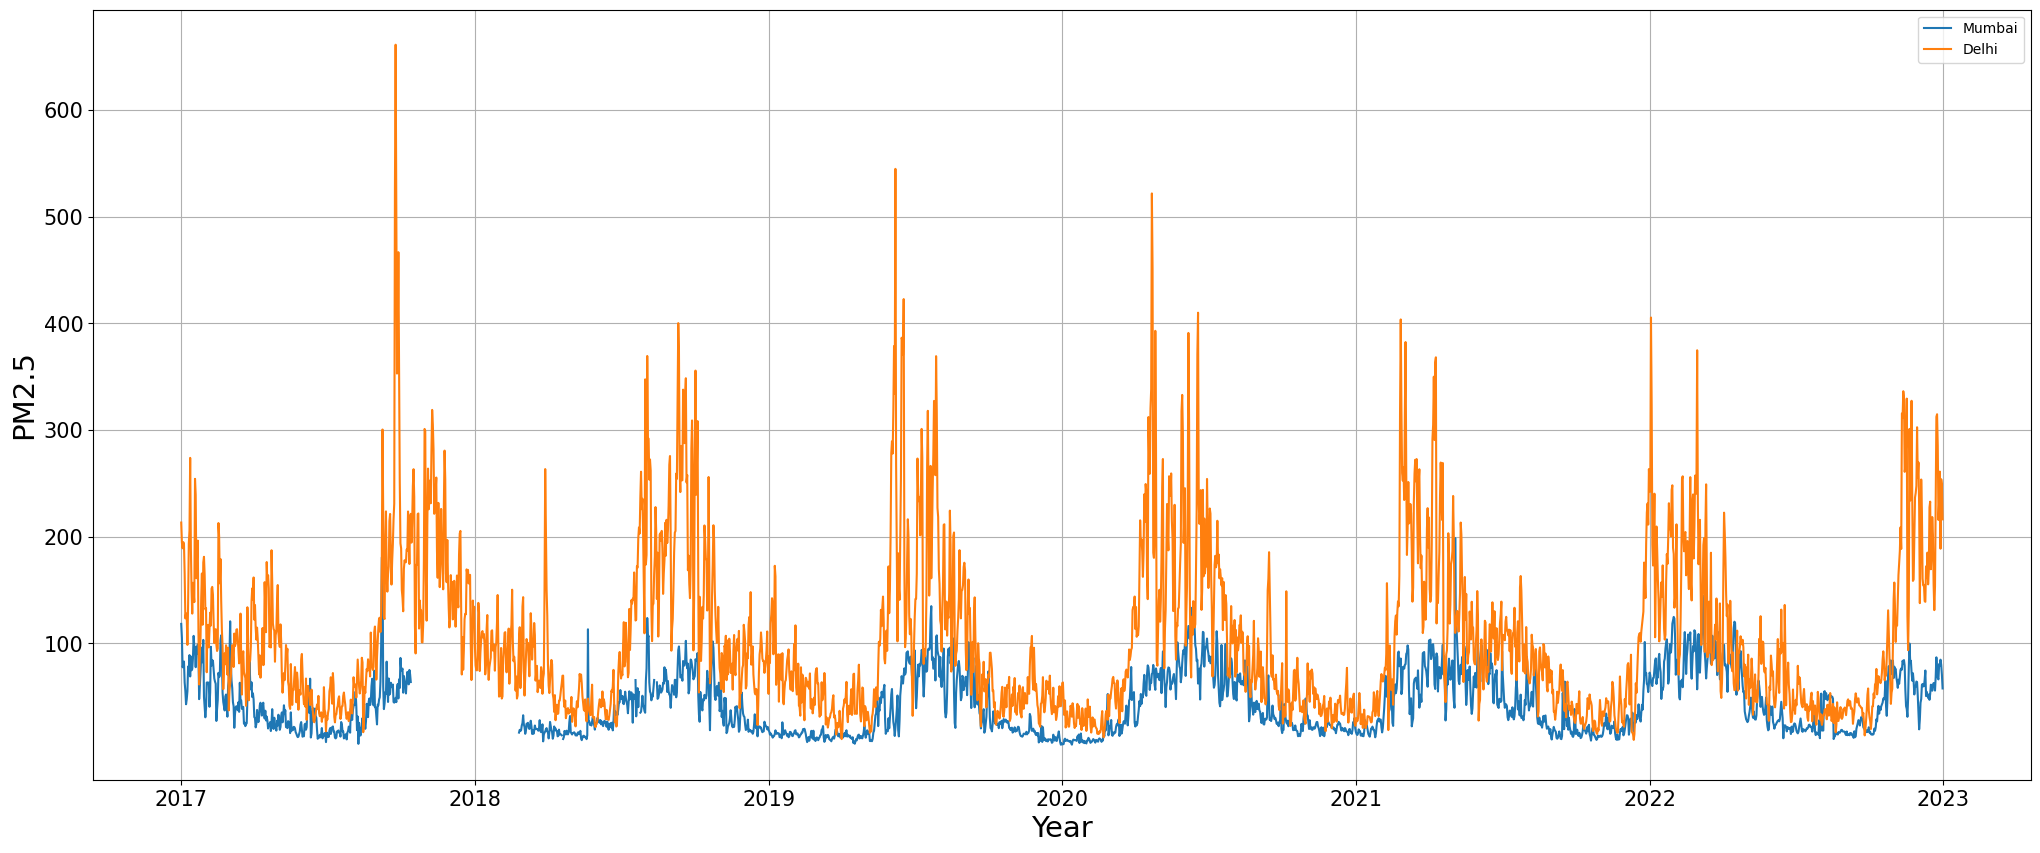

The fluctuation in Mumbai 28.418444008252862
The fluctuation in Delhi 77.73285570085264
The fluctuation is more in the city of Delhi Delhi


In [29]:
datetime=pd.to_datetime(data_set['Timestamp'])
data_between_2015_2023=data_set.loc[datetime.dt.year<=2023]
delhi_data=data_between_2015_2023.loc[data_between_2015_2023['city']=='Delhi'].groupby('Timestamp')['PM2.5'].mean()
mumbai_data=data_between_2015_2023.loc[data_between_2015_2023['city']=='Mumbai'].groupby('Timestamp')['PM2.5'].mean()
display(delhi_data,mumbai_data)
fig,ax=plt.subplots(figsize=(25,10))
ax.plot(mumbai_data.index,mumbai_data.values,label='Mumbai')
ax.plot(delhi_data.index,delhi_data.values,label='Delhi')
ax.grid()
ax.legend()
ax.set_xticks(np.linspace(0,delhi_data.index.size,7))
ax.set_xticklabels([2017,2018,2019,2020,2021,2022,2023],fontsize=15)
ax.set_xlabel('Year',fontsize=21)
ax.set_ylabel('PM2.5',fontsize=21)
ax.set_yticks([100,200,300,400,500,600])
ax.set_yticklabels([100,200,300,400,500,600],fontsize=15)
plt.show()
delhi_fluc=delhi_data.std()
mumbai_fluc=mumbai_data.std()
print('The fluctuation in Mumbai',mumbai_fluc)
print('The fluctuation in Delhi',delhi_fluc)
if max(mumbai_fluc,delhi_fluc)==mumbai_fluc:
    city_with_more_fluc='Mumbai'
else:
    city_with_more_fluc='Delhi'
print('The fluctuation is more in the city of Delhi',city_with_more_fluc)

# Population Based

### Question 1
#### Which state in India has the highest number of monitoring stations relative to its population? 

In [32]:
data_set = pd.read_csv('Downloads/Data.csv')

In [33]:
State_data=pd.read_csv('Downloads/State_data.csv')

In [34]:
state_wise_monitoring_station = data_set.groupby(['state'])['station'].nunique() #or unique.apply(lambda x:x)

State_data=State_data.sort_values('State')
station_relative_to_population = (state_wise_monitoring_station.values/State_data['Population'])*1e6

print('State having the most number of monitoring station relative to its population is:',State_data.loc[station_relative_to_population.idxmax()]['State'])

State having the most number of monitoring station relative to its population is: Chandigarh


### Question 2

Text(0, 0.5, 'PM2.5 exposure per capita')

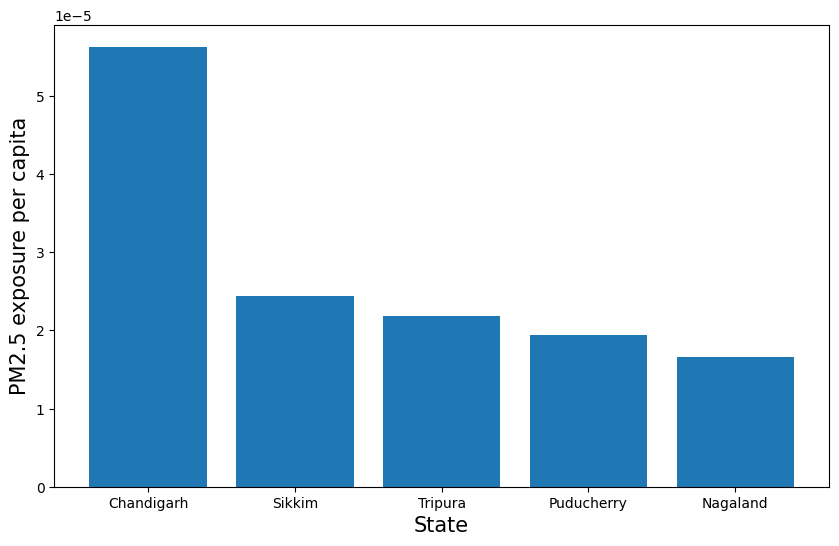

In [36]:
data_set.reset_index()
datetime=pd.to_datetime(data_set['Timestamp']).dt.year
data_2023=data_set.loc[datetime==2023][['state','PM2.5']]
data_2023_pm_levels=data_2023.groupby('state')['PM2.5'].mean()
pm_per_capita_state=data_2023_pm_levels/State_data.set_index('State')['Population']
top_5_exposure=pm_per_capita_state.sort_values(ascending=False).head(5)

fig,ax=plt.subplots(figsize=(10,6))
ax.bar(top_5_exposure.index,top_5_exposure.values)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('PM2.5 exposure per capita',fontsize=15)

### Question 3

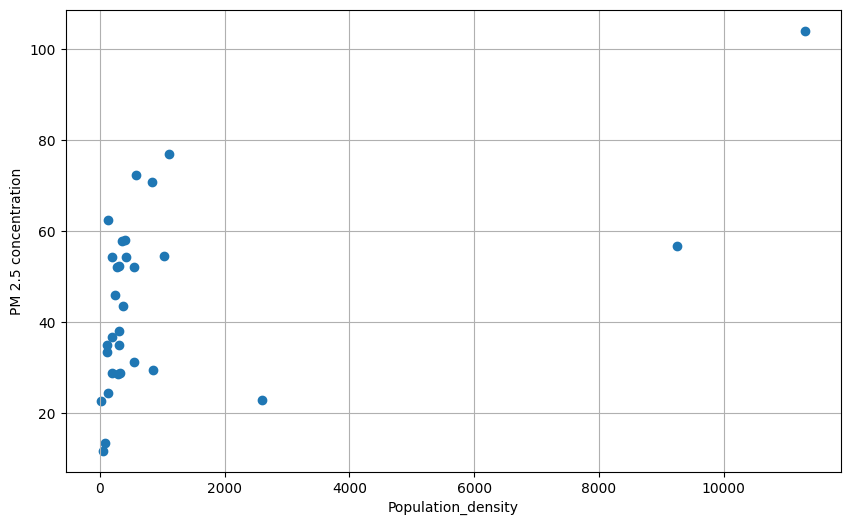

In [38]:
population_density=State_data['Population']/State_data['Area (km2)']
average_pm2_conc=data_set.groupby('state')['PM2.5'].mean()
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(population_density,average_pm2_conc)
ax.set_xlabel('Population_density')
ax.set_ylabel('PM 2.5 concentration')
ax.grid()

We can say that states with lower population density show a lot of variance in PM 2.5 concentration but usually have less 
PM2.5 concentration, whereas higher population density(above 8000) shows higher PM2.5 concetration

# Area Based

### Question 1

State with highest PM 2.5 concentration per sqkm Chandigarh 0.49707721560304186


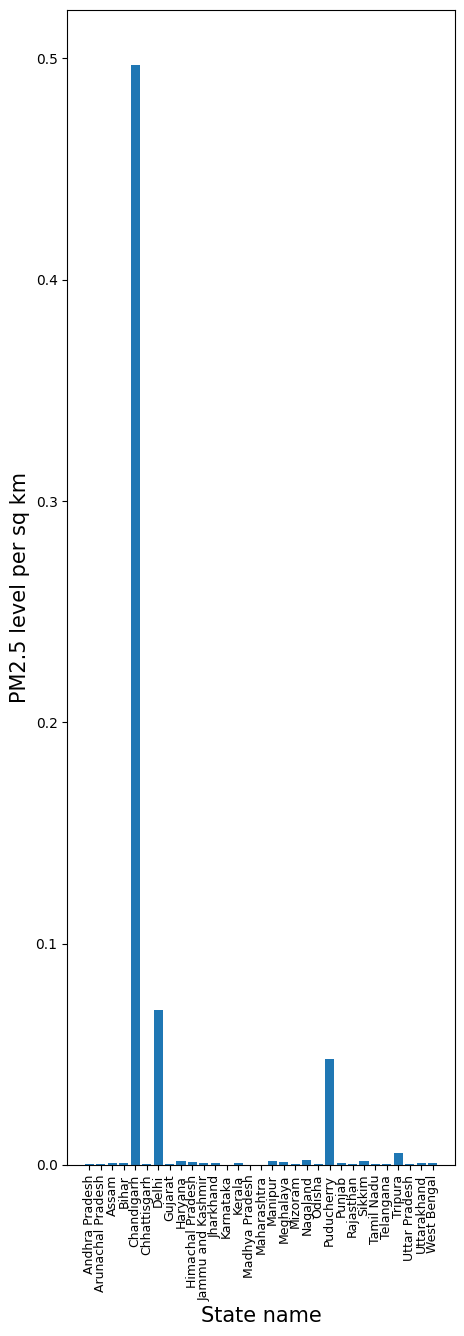

In [42]:
average_pm25_state=data_set.groupby('state')['PM2.5'].mean()

pm25_conc_by_state_area=average_pm25_state/State_data.set_index('State')['Area (km2)']

print('State with highest PM 2.5 concentration per sqkm',pm25_conc_by_state_area.idxmax(),pm25_conc_by_state_area.max())

fig,ax=plt.subplots(figsize=(5,15))
ax.set_xticks(np.arange(0,len(pm25_conc_by_state_area.index)))
ax.set_xlabel('State name',fontsize=15)
ax.set_ylabel('PM2.5 level per sq km',fontsize=15)
ax.set_xticklabels(pm25_conc_by_state_area.index,rotation=90,fontsize=9)
ax.bar(pm25_conc_by_state_area.index,pm25_conc_by_state_area.values)
plt.show()

**Log Scale**

Text(0, 0.5, 'PM2.5 per sq km')

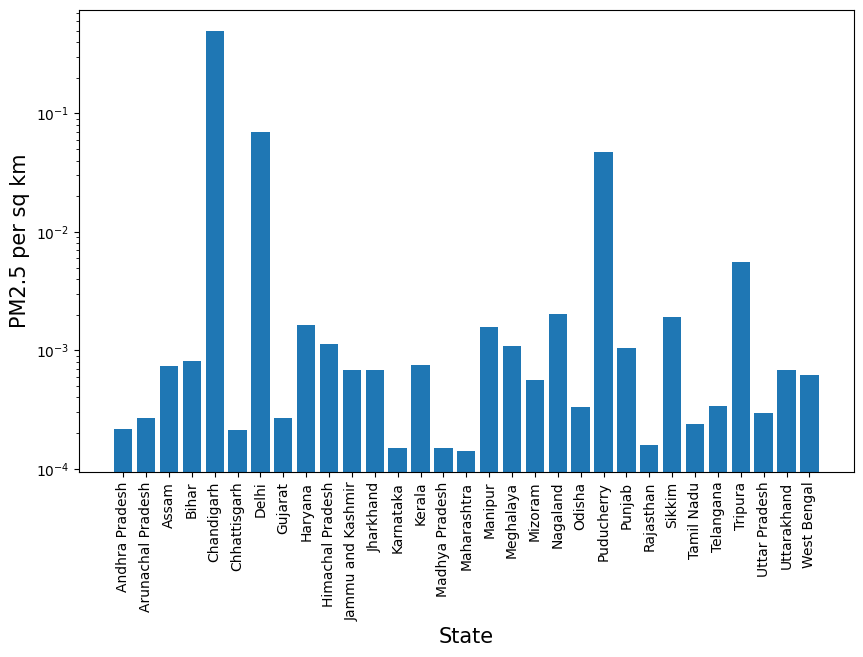

In [44]:
average_pm25_state=data_set.groupby('state')['PM2.5'].mean()

pm25_conc_by_state_area=average_pm25_state/State_data.set_index('State')['Area (km2)']

fig,ax=plt.subplots(figsize=(10,6))
ax.set_xticks(np.arange(0,len(pm25_conc_by_state_area.index)))
ax.set_xticklabels(pm25_conc_by_state_area.index,rotation=90)
ax.set_yscale("log")
ax.bar(pm25_conc_by_state_area.index,pm25_conc_by_state_area.values)
ax.set_xlabel('State',fontsize=15)
ax.set_ylabel('PM2.5 per sq km',fontsize=15)

### Question 2

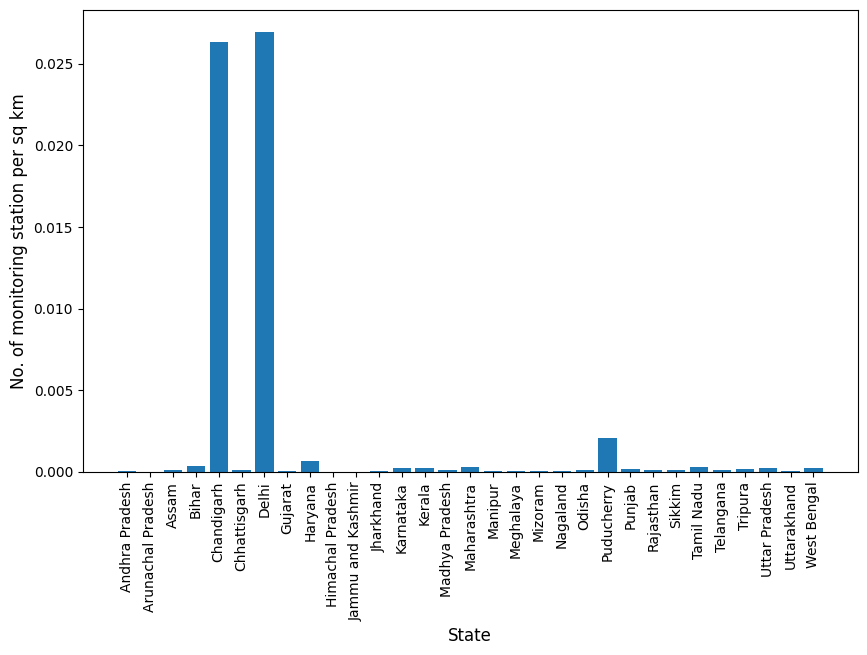

In [46]:
no_of_monitoring_station_by_state=data_set.groupby('state')['station'].nunique()

no_of_monitoring_station_per_sqkm = no_of_monitoring_station_by_state/State_data.set_index('State')['Area (km2)']

fig,ax=plt.subplots(figsize=(10,6))
ax.bar(no_of_monitoring_station_per_sqkm.index,no_of_monitoring_station_per_sqkm.values)
ax.set_xticks(np.arange(len(no_of_monitoring_station_per_sqkm)))
ax.set_xticklabels(no_of_monitoring_station_per_sqkm.index,rotation=90)
ax.set_xlabel('State',fontsize=12)
ax.set_ylabel('No. of monitoring station per sq km',fontsize=12)
plt.show()

### Question 3


In [48]:
year=pd.to_datetime(data_set['Timestamp']).dt.year
maharashtra_data=data_set[data_set['state']=='Maharashtra'].loc[year==2021]
madhya_pradesh_data=data_set[data_set['state']=='Madhya Pradesh'].loc[year==2022]
maharashtra_pm25_2021=maharashtra_data['PM2.5'].mean()
madhya_pradesh_pm25_2021=madhya_pradesh_data['PM2.5'].mean()
if (maharashtra_pm25_2021>madhya_pradesh_pm25_2021):
    max_city='Maharashtra'
else:
    max_city='Madhya Pradesh'
population_density_maharashtra=State_data.set_index('State').loc['Maharashtra']['Population']/State_data.set_index('State').loc['Maharashtra']['Area (km2)']
population_density_madhya_pradesh=State_data.set_index('State').loc['Madhya Pradesh']['Population']/State_data.set_index('State').loc['Madhya Pradesh']['Area (km2)']
if population_density_madhya_pradesh>population_density_maharashtra:
    max_pop_dens='Madhya Pradesh'
else:
    max_pop_dens='Maharashtra'
df=pd.DataFrame({'State':['Maharashtra','Madhya Pradesh'],'Population Density':[population_density_maharashtra,population_density_madhya_pradesh],'Average PM2.5':[maharashtra_pm25_2021,madhya_pradesh_pm25_2021]}).set_index('State')
print(df)
print("Which has more population density Maharashtra or Madhya Pradesh:",max_pop_dens)
print("Which has more pollution Maharashtra or Madhya Pradesh:",max_city)

                Population Density  Average PM2.5
State                                            
Maharashtra             365.192023      46.440044
Madhya Pradesh          235.608557      47.538115
Which has more population density Maharashtra or Madhya Pradesh: Maharashtra
Which has more pollution Maharashtra or Madhya Pradesh: Madhya Pradesh


 #### The above table shows that even though population density decreases , the pollution increses. There must be little correlation between these two data. There are many other factors at play in this situation, though naturally it comes to the mind that as population density increases the pollution levels must increase.

# Funding Based

### Question 1

In [52]:
state_received_funding=NCAP_funding.groupby('State')['Amount released during FY 2021-22'].apply(lambda x: ((x.str.find('-')==-1) & (x.str.slice(0,2)!='0')).any())
state_received_funding.astype(int)
average_pm25=data_set.groupby('state')['PM2.5'].mean()
state_has_funding=state_received_funding[state_received_funding == 1]
state_no_funding=state_received_funding[state_received_funding == 0]
state_funding_pm25=pd.concat([average_pm25,state_has_funding],axis='columns')
state_no_funding_pm25=pd.concat([average_pm25,state_no_funding],axis='columns')

average_no_funding = state_funding_pm25[state_funding_pm25['Amount released during FY 2021-22']==True]['PM2.5'].mean()
average_funding = state_no_funding_pm25[state_no_funding_pm25['Amount released during FY 2021-22']==False]['PM2.5'].mean()

print('States that recieved some fundings average PM2.5 levels:',average_funding)
print('State that did not receive any funding average PM2.5 levels:',average_no_funding)

NameError: name 'NCAP_funding' is not defined

### Question2

In [ ]:
assam_data=data_set[data_set['state']=='Assam']
assam_2021=assam_data[assam_data['Timestamp'].str.slice(0,4) == '2021']['PM2.5'].mean()
assam_2020=assam_data[assam_data['Timestamp'].str.slice(0,4) == '2020']['PM2.5'].mean()
assam_2019=assam_data[assam_data['Timestamp'].str.slice(0,4) == '2019']['PM2.5'].mean()
assam_pm25_data=[assam_2019,assam_2020,assam_2021]
year_xlabel=['2019','2020','2021']
NCAP_2019=NCAP_funding[NCAP_funding['State']=='Assam']['Amount released during FY 2019-20'].str.replace('-','0').astype(float).sum()
NCAP_2020=NCAP_funding[NCAP_funding['State']=='Assam']['Amount released during FY 2020-21'].str.replace('-','0').astype(float).sum()
NCAP_2021=NCAP_funding[NCAP_funding['State']=='Assam']['Amount released during FY 2021-22'].str.replace('-','0').astype(float).sum()
NCAP_funding_data=[NCAP_2019,NCAP_2020,NCAP_2021]
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(year_xlabel,assam_pm25_data,label='PM2.5',marker='o')
ax.plot(year_xlabel,NCAP_funding_data,label='Funding',marker='o')
for i in range(3):
    ax.text(year_xlabel[i],assam_pm25_data[i]-2,(year_xlabel[i],round(assam_pm25_data[i],2)))
    ax.text(year_xlabel[i],NCAP_funding_data[i]-2,(year_xlabel[i],round(NCAP_funding_data[i],2)))
ax.legend()
ax.grid()
plt.show()

We can see that even though funding was given in the 2019 , PM 2.5 levels increased in 2020 and in 2021 they the pollution decreased by a marginal amount.

### Question 3

In [ ]:
total_funding=NCAP_funding.groupby('State')['Total fund released'].sum()
state_area=State_data.set_index('State')['Area (km2)']
df_data=pd.concat([total_funding,state_area],axis='columns')

##  Fixing Spelling mismatch in data
df_data=df_data.drop('Jammu and Kashmir')
df_data.loc['Jammu & Kashmir','Area (km2)']=42241
total_fund_released=df_data['Total fund released']
area_km2=df_data['Area (km2)']
fig1,ax1 = plt.subplots(figsize=(18,12))
colours=colors= [
    'red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'black', 'cadetblue',
    'gray', 'orange', 'pink', 'purple', 'brown', 'lime', 'indigo', 'violet',
    'gold', 'silver', 'beige', 'lavender', 'turquoise', 'peachpuff', 'coral',
    'peru', 'khaki', 'maroon', 'orchid', 'sienna', 'chartreuse', 'crimson', 'firebrick','palegoldenrod'
]
for i in range(len(df_data.index)):
    ax1.scatter(area_km2.iloc[i],total_fund_released.iloc[i],c=colours[i],s=50,label=df_data.index[i])
ax1.grid()
ax1.legend(loc='upper left')
ax1.set_xlabel('Area of states',fontsize=15)
ax1.set_ylabel('Funds Released',fontsize=15)
plt.show()
print(len(df_data.index))

# Miscellaneous Questions

### Question1 

In [ ]:

data_2023=data_set[pd.to_datetime(data_set.loc[:,'Timestamp']).dt.year==2023]

city_max=data_2023.groupby('city')['PM2.5'].mean().idxmax()
city_data=data_2023.set_index('city').loc[city_max]
city_data

no_of_days_dangerous=len(city_data[city_data['PM2.5']>300])
percentage_of_days=(no_of_days_dangerous/365)*100
print('Percentage of days which have PM2.5 level greater than 300 :', percentage_of_days)

### Question2

In [ ]:
data_delhi=data_set[data_set['state']=='Delhi']
dates=pd.to_datetime(data_delhi['Timestamp'])
years_required=(dates.dt.year==2018)|(dates.dt.year==2019)|(dates.dt.year==2020)
data_2018_2019_2020=data_delhi[years_required]
dates_18_19_20=pd.to_datetime(data_2018_2019_2020['Timestamp'])

new_year_data=data_2018_2019_2020[(dates_18_19_20.dt.month==1) & (dates_18_19_20.dt.day==1)].groupby('Timestamp')['PM2.5'].mean()
diwali_oct_nov_data=data_2018_2019_2020[(dates_18_19_20.dt.month == 10) | (dates_18_19_20.dt.month==11)].groupby('Timestamp')['PM2.5'].mean()
diwali_oct_nov_data_2018=diwali_oct_nov_data[diwali_oct_nov_data.index.str.slice(0,4)=='2018']
diwali_oct_nov_data_2019=diwali_oct_nov_data[diwali_oct_nov_data.index.str.slice(0,4)=='2019']
diwali_oct_nov_data_2020=diwali_oct_nov_data[diwali_oct_nov_data.index.str.slice(0,4)=='2020']
regular_data= data_2018_2019_2020[(dates_18_19_20.dt.month != 10) & (dates_18_19_20.dt.month!=11) & (dates_18_19_20.dt.month!=1)
& (dates_18_19_20.dt.day!=1)].groupby('Timestamp')['PM2.5'].mean()
print('New Year data:',new_year_data)
print('Diwali data:',diwali_oct_nov_data_2018,diwali_oct_nov_data_2019,diwali_oct_nov_data_2020)
print('Regular data:', regular_data)
#PM2.5 level

fig,ax=plt.subplots(figsize=(20,12))
ax.plot(data_2018_2019_2020.groupby('Timestamp')['PM2.5'].mean(),color='purple')


#Annotating New Years
for i in new_year_data.index:
    text=i+' New Year'
    ax.annotate(text,xy=(i,new_year_data[i].mean()+160))
    ax.arrow(i,new_year_data[i]+150,0,-150,head_width=10)

# Festival Annotation
ax.annotate('2018 Festival max' ,xy=(diwali_oct_nov_data_2018.idxmax(),diwali_oct_nov_data_2018.max()+160))
ax.arrow(diwali_oct_nov_data_2018.idxmax(),diwali_oct_nov_data_2018.max()+160,0,-150,head_width=10)

ax.annotate('2019 Festival max' ,xy=(diwali_oct_nov_data_2019.idxmax(),diwali_oct_nov_data_2019.max()+160))
ax.arrow(diwali_oct_nov_data_2019.idxmax(),diwali_oct_nov_data_2019.max()+160,0,-150,head_width=10)

ax.annotate('2020 Festival max' ,xy=(diwali_oct_nov_data_2020.idxmax(),diwali_oct_nov_data_2020.max()+160))
ax.arrow(diwali_oct_nov_data_2020.idxmax(),diwali_oct_nov_data_2020.max()+160,0,-150,head_width=10)

ax.set_xticks([0,182,365,547,730,912,1095])
ax.set_xticklabels(['|',2018,'|',2019,'|',2020,'|'],fontsize=12)

ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('PM2.5 level',fontsize=15)
ax.grid()
plt.show()

### Question 3

In [ ]:
state_max=NCAP_funding.iloc[NCAP_funding['Amount released during FY 2020-21'].idxmax()][['State','Amount released during FY 2020-21']]
print("State that received max funding:",state_max['State'],',with funding amount :',state_max['Amount released during FY 2020-21'])
data_2020=data_set[pd.to_datetime(data_set['Timestamp']).dt.year==2020].groupby('state')['PM2.5'].mean()
data_2023=data_set[pd.to_datetime(data_set['Timestamp']).dt.year==2023].groupby('state')['PM2.5'].mean()
is_greater = ~(data_2023>data_2020)
df=pd.concat([data_2020,data_2023,is_greater],axis='columns')
df.columns=['PM2.5 2020','PM2.5 2023','LESSER POLLUTION']
print("Data:\n",df.loc[state_max['State']],'\n')
print('We can see that the pollution level has decreased but not by a lot')

state_data=data_set[data_set['state']==state_max['State']]
state_pm25_yearly_average=state_data.groupby(state_data['Timestamp'].str.slice(0,4))['PM2.5'].mean()
print('State yearly average:',state_pm25_yearly_average)
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(state_pm25_yearly_average.index,state_pm25_yearly_average.values,marker='o',linestyle='-',color='yellow',linewidth=2,mfc='green')
ax.set_title(f'Yearly average PM 2.5 levels of state {state_max['State']}')
ax.set_xlabel('Year')
ax.set_ylabel('PM 2.5 levels')
ax.set_ylim(50,65)
ax.grid()

### Question 4

##### Only using matplotlib and pil

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from PIL import Image

In [ ]:
img=Image.open(r"C:\Users\Rathin\Downloads\map-5505725_1280.PNG")
img_array=np.array(img)
long_and_lat=data_set.loc[:,['address','latitude','longitude']]
long_lat_data=long_and_lat.groupby('address')[['latitude','longitude']].mean()
fig,ax=plt.subplots(figsize=(10,10))
x=np.random.randint(0,100,20)
# Latitude and longitude of extremes of India
ax.imshow(img_array,extent=(68+(7/60),97+(25/60),8+(4/60),37+(6/60)))
for i in range(len(long_lat_data)):
    #ax.annotate('.',xy=(long_lat_data.iloc[i,1],long_lat_data.iloc[i,0]),color='red',fontsize=30)
    ax.scatter(long_lat_data.iloc[i,1],long_lat_data.iloc[i,0],color='red')
ax.grid()
plt.show()

[Source for the above image](https://cdn.pixabay.com/photo/2020/08/21/10/00/map-5505725_1280.png)

##### Using cartopy

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sample data: latitudes and longitudes of locations in India
locations={}
for i in range(len(long_lat_data)):
    locations[long_lat_data.iloc[i].name] = (long_lat_data.iloc[i,0],long_lat_data.iloc[i,1])

# Create a map with a specific projection (for India, PlateCarree works well)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

ax.set_extent([68, 98, 6, 37], crs=ccrs.PlateCarree())  # [min_lon, max_lon, min_lat, max_lat]

for city, (lat, lon) in locations.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())

ax.set_title(' Sensor Locations in India')


plt.show()


# EXTRA QUESTION

In [ ]:
latitude_pollution_data=data_set.groupby('latitude')['PM2.5'].mean()
sns.scatterplot(latitude_pollution_data)
plt.show()

longitude_pollution_data=data_set.groupby('longitude')['PM2.5'].mean()
sns.scatterplot(longitude_pollution_data)
plt.show()

In [ ]:
latitude_pollution_data=data_set.groupby('latitude')['PM10'].mean()
sns.scatterplot(latitude_pollution_data)
plt.show()

longitude_pollution_data=data_set.groupby('longitude')['PM10'].mean()
sns.scatterplot(longitude_pollution_data)
plt.show()

We can see in the second plot that as we move east to west the polltution level is mostly distributed , while moving from north to south the pollution is mostly increasing .